In [7]:

# Part 1 - Data Preprocessing

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [8]:
# Importing the training set
dataset_train = pd.read_csv('Google_Stock_Price_Train.csv')
training_set = dataset_train.iloc[:, 1:2].values


In [9]:

# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)


In [10]:

# Creating a data structure with 60 timesteps and 1 output
X_train = []
y_train = []
for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i, 0])  #create 60 variables starting with Xt, X(t+1)....X(t+60)
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))


In [11]:
X_train.shape

(1198, 60, 1)

In [12]:
# Part 2 - Building the RNN

# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [13]:
# Initialising the RNN
regressor = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
History = regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

# Model metrics visualization 

plt.figure(figsize = (20,10))

# summarize history for accuracy
plt.plot(History.history['acc'])
plt.plot(History.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.figure(figsize = (20,10))

# summarize history for loss
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Epoch 1/100
1198/1198 [==============================] - 28s 24ms/step - loss: 0.0488
Epoch 2/100
1198/1198 [==============================] - 12s 10ms/step - loss: 0.0060
Epoch 3/100
1198/1198 [==============================] - 12s 10ms/step - loss: 0.0053
Epoch 4/100
1198/1198 [==============================] - 12s 10ms/step - loss: 0.0052
Epoch 5/100
1198/1198 [==============================] - 12s 10ms/step - loss: 0.0046
Epoch 6/100
1198/1198 [==============================] - 12s 10ms/step - loss: 0.0046
Epoch 7/100
1198/1198 [==============================] - 12s 10ms/step - loss: 0.0043
Epoch 8/100
1198/1198 [==============================] - 12s 10ms/step - loss: 0.0044
Epoch 9/100
1198/1198 [==============================] - 12s 10ms/step - loss: 0.0050
Epoch 10/10

1198/1198 [==============================] - 12s 10ms/step - loss: 0.0019
Epoch 73/100
1198/1198 [==============================] - 12s 10ms/step - loss: 0.0019
Epoch 74/100
1198/1198 [==============================] - 12s 10ms/step - loss: 0.0017
Epoch 75/100
1198/1198 [==============================] - 12s 10ms/step - loss: 0.0019
Epoch 76/100
1198/1198 [==============================] - 12s 10ms/step - loss: 0.0017
Epoch 77/100
1198/1198 [==============================] - 12s 10ms/step - loss: 0.0016
Epoch 78/100
1198/1198 [==============================] - 12s 10ms/step - loss: 0.0016
Epoch 79/100
1198/1198 [==============================] - 12s 10ms/step - loss: 0.0017
Epoch 80/100
1198/1198 [==============================] - 12s 10ms/step - loss: 0.0016
Epoch 81/100
1198/1198 [==============================] - 12s 10ms/step - loss: 0.0016
Epoch 82/100
1198/1198 [==============================] - 12s 10ms/step - loss: 0.0015
Epoch 83/100
1198/1198 [==============================] 

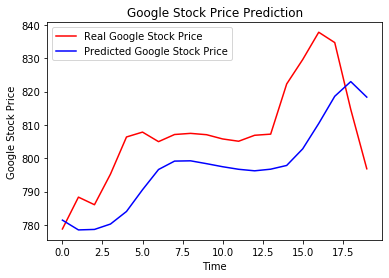

In [14]:
# Part 3 - Making the predictions and visualising the results

# Getting the real stock price of 2017
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

# Getting the predicted stock price of 2017
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

# Visualising the results
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

In [74]:
"""Note: delete this cell for exam"""
#example to understand how the data was transformed
X_train = []
y_train = []
for i in range(4, 20):
   
    print(i)
    X_train.append(stock[i-4:i])   #here we are creating 60 varibales starting with
    print(X_train)
    y_train.append(stock[i])
    print(y_train)

4
[array([1, 2, 3, 4])]
[5]
5
[array([1, 2, 3, 4]), array([2, 3, 4, 5])]
[5, 6]
6
[array([1, 2, 3, 4]), array([2, 3, 4, 5]), array([3, 4, 5, 6])]
[5, 6, 7]
7
[array([1, 2, 3, 4]), array([2, 3, 4, 5]), array([3, 4, 5, 6]), array([4, 5, 6, 7])]
[5, 6, 7, 8]
8
[array([1, 2, 3, 4]), array([2, 3, 4, 5]), array([3, 4, 5, 6]), array([4, 5, 6, 7]), array([5, 6, 7, 8])]
[5, 6, 7, 8, 9]
9
[array([1, 2, 3, 4]), array([2, 3, 4, 5]), array([3, 4, 5, 6]), array([4, 5, 6, 7]), array([5, 6, 7, 8]), array([6, 7, 8, 9])]
[5, 6, 7, 8, 9, 10]
10
[array([1, 2, 3, 4]), array([2, 3, 4, 5]), array([3, 4, 5, 6]), array([4, 5, 6, 7]), array([5, 6, 7, 8]), array([6, 7, 8, 9]), array([ 7,  8,  9, 10])]
[5, 6, 7, 8, 9, 10, 11]
11
[array([1, 2, 3, 4]), array([2, 3, 4, 5]), array([3, 4, 5, 6]), array([4, 5, 6, 7]), array([5, 6, 7, 8]), array([6, 7, 8, 9]), array([ 7,  8,  9, 10]), array([ 8,  9, 10, 11])]
[5, 6, 7, 8, 9, 10, 11, 12]
12
[array([1, 2, 3, 4]), array([2, 3, 4, 5]), array([3, 4, 5, 6]), array([4, 5, 6, 7

In [75]:
np.array(X_train)

array([[ 1,  2,  3,  4],
       [ 2,  3,  4,  5],
       [ 3,  4,  5,  6],
       [ 4,  5,  6,  7],
       [ 5,  6,  7,  8],
       [ 6,  7,  8,  9],
       [ 7,  8,  9, 10],
       [ 8,  9, 10, 11],
       [ 9, 10, 11, 12],
       [10, 11, 12, 13],
       [11, 12, 13, 14],
       [12, 13, 14, 15],
       [13, 14, 15, 16],
       [14, 15, 16, 17],
       [15, 16, 17, 18],
       [16, 17, 18, 19]])